## importar librerías 

In [4]:
import pandas as pd
import numpy as np

## leer el la tabla viviendas 2015 

In [9]:
path='C:/Users/MALIK/Downloads/viviendas2015-clean.csv'
df = pd.read_csv(path,encoding='latin',low_memory=False)
df.head()

,Unnamed: 0,Unnamed: 0.1,VIV_SEL,P1_1,P1_2,P1_3,P1_4,P1_5_1,P1_5_2,P2_1,P2_2,P2_3,cve_est,cve_mun
0,0,0,5,2,1,1,1,1,1,4,1,1,1,1
1,1,1,1,3,1,1,1,1,1,7,1,1,1,1
2,2,2,3,3,1,1,1,1,1,8,1,1,1,1
3,3,3,4,3,1,1,1,1,1,5,1,1,1,1
4,4,4,5,3,1,1,1,1,1,6,1,1,1,1


## eliminar las columnas ""

In [10]:
df.drop('Unnamed: 0', 1, inplace=True)
df.drop('Unnamed: 0.1', 1, inplace=True)

In [11]:
import numpy as np
import pandas as pd
from sklearn import metrics
from sklearn.preprocessing import StandardScaler

import matplotlib.pyplot as plt #para graficar 
from sklearn.cluster import KMeans #para clasificar los datos
import sklearn as sk #para normalizar los datos

## noramalizar los datos

In [12]:
X = sk.preprocessing.normalize(df, norm='l2', axis=1, copy=True)
X

array([[0.68041382, 0.27216553, 0.13608276, ..., 0.13608276, 0.13608276,
        0.13608276],
       [0.12126781, 0.36380344, 0.12126781, ..., 0.12126781, 0.12126781,
        0.12126781],
       [0.31448545, 0.31448545, 0.10482848, ..., 0.10482848, 0.10482848,
        0.10482848],
       ...,
       [0.56011203, 0.28005602, 0.14002801, ..., 0.14002801, 0.28005602,
        0.56011203],
       [0.28005602, 0.28005602, 0.14002801, ..., 0.14002801, 0.28005602,
        0.56011203],
       [0.07803403, 0.05202269, 0.02601134, ..., 0.02601134, 0.20809075,
        0.96241971]])

## gráfica de elbow para determinar # de clusters

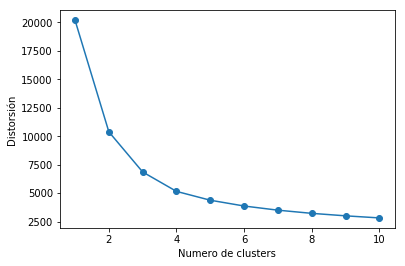

In [13]:
distortions = []

for i in range(1,11):
    km = KMeans(n_clusters=i,
                init='k-means++',
                n_init=10,
                max_iter=300,
                random_state=0)
    km.fit(X)
    distortions.append(km.inertia_)

plt.plot(range(1,11), distortions, marker='o')
plt.xlabel('Numero de clusters')
plt.ylabel('Distorsión')
plt.show()

# K-means

In [14]:
clusters = KMeans(n_clusters=4,
                    init='k-means++', 
                    max_iter=300,
                    tol=1e-04,
                    n_init=10,
                    random_state=0)  

print(np.unique(clusters.fit_predict(X)))

[0 1 2 3]


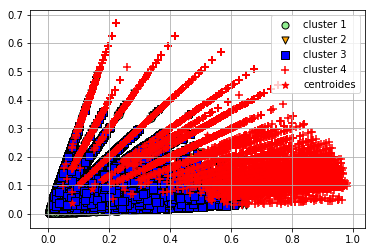

In [15]:
y_km = clusters.fit_predict(X)
plt.scatter(X[y_km==0,0],
          X[y_km==0,1],
          s=50,
          c='lightgreen',
          edgecolor='black',
          marker='o',
          label='cluster 1')
plt.scatter(X[y_km==1,0],
          X[y_km==1,1],
          s=50,
          c='orange',
          edgecolor='black',
          marker='v',
          label='cluster 2')
plt.scatter(X[y_km==2,0],
          X[y_km==2,1],
          s=50,
          c='blue',
          edgecolor='black',
          marker='s',
          label='cluster 3')
plt.scatter(X[y_km==3,0],
          X[y_km==3,1],
          s=50,
          c='red',
          edgecolor='black',
          marker='+',
          label='cluster 4')

plt.scatter(clusters.cluster_centers_[:,0],
          clusters.cluster_centers_[:,1],
          s=50,
          c='red',
          marker='*',
          label='centroides')


plt.legend()
plt.grid()
plt.show()

## aplicando PCA a K-means

In [16]:
from sklearn.decomposition import PCA
pca=PCA(n_components=2)
pca.fit(X)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [17]:
X=pca.transform(X)

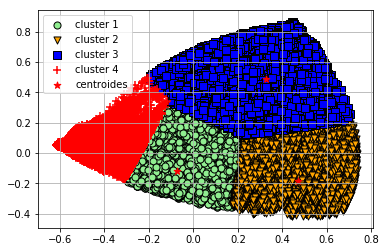

In [18]:
y_km = clusters.fit_predict(X)
plt.scatter(X[y_km==0,0],
          X[y_km==0,1],
          s=50,
          c='lightgreen',
          edgecolor='black',
          marker='o',
          label='cluster 1')
plt.scatter(X[y_km==1,0],
          X[y_km==1,1],
          s=50,
          c='orange',
          edgecolor='black',
          marker='v',
          label='cluster 2')
plt.scatter(X[y_km==2,0],
          X[y_km==2,1],
          s=50,
          c='blue',
          edgecolor='black',
          marker='s',
          label='cluster 3')
plt.scatter(X[y_km==3,0],
          X[y_km==3,1],
          s=50,
          c='red',
          edgecolor='black',
          marker='+',
          label='cluster 4')

plt.scatter(clusters.cluster_centers_[:,0],
          clusters.cluster_centers_[:,1],
          s=50,
          c='red',
          marker='*',
          label='centroides')


plt.legend()
plt.grid()
plt.show()

## PCA - K-means 

In [19]:
path='C:/Users/MALIK/Downloads/viviendas2015-clean.csv'
df1 = pd.read_csv(path,encoding='latin',low_memory=False)
df1.head()

,Unnamed: 0,Unnamed: 0.1,VIV_SEL,P1_1,P1_2,P1_3,P1_4,P1_5_1,P1_5_2,P2_1,P2_2,P2_3,cve_est,cve_mun
0,0,0,5,2,1,1,1,1,1,4,1,1,1,1
1,1,1,1,3,1,1,1,1,1,7,1,1,1,1
2,2,2,3,3,1,1,1,1,1,8,1,1,1,1
3,3,3,4,3,1,1,1,1,1,5,1,1,1,1
4,4,4,5,3,1,1,1,1,1,6,1,1,1,1


In [20]:
df1.drop('Unnamed: 0', 1, inplace=True)
df1.drop('Unnamed: 0.1', 1, inplace=True)

In [21]:
X = sk.preprocessing.normalize(df1, norm='l2', axis=1, copy=True)
X

array([[0.68041382, 0.27216553, 0.13608276, ..., 0.13608276, 0.13608276,
        0.13608276],
       [0.12126781, 0.36380344, 0.12126781, ..., 0.12126781, 0.12126781,
        0.12126781],
       [0.31448545, 0.31448545, 0.10482848, ..., 0.10482848, 0.10482848,
        0.10482848],
       ...,
       [0.56011203, 0.28005602, 0.14002801, ..., 0.14002801, 0.28005602,
        0.56011203],
       [0.28005602, 0.28005602, 0.14002801, ..., 0.14002801, 0.28005602,
        0.56011203],
       [0.07803403, 0.05202269, 0.02601134, ..., 0.02601134, 0.20809075,
        0.96241971]])

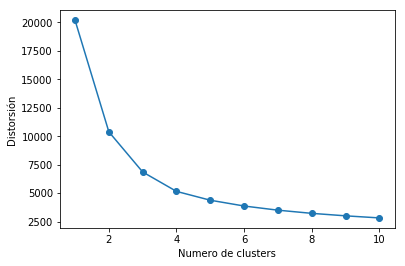

In [22]:
distortions = []

for i in range(1,11):
    km = KMeans(n_clusters=i,
                init='k-means++',
                n_init=10,
                max_iter=300,
                random_state=0)
    km.fit(X)
    distortions.append(km.inertia_)

plt.plot(range(1,11), distortions, marker='o')
plt.xlabel('Numero de clusters')
plt.ylabel('Distorsión')
plt.show()

In [23]:
df1.head()

,VIV_SEL,P1_1,P1_2,P1_3,P1_4,P1_5_1,P1_5_2,P2_1,P2_2,P2_3,cve_est,cve_mun
0,5,2,1,1,1,1,1,4,1,1,1,1
1,1,3,1,1,1,1,1,7,1,1,1,1
2,3,3,1,1,1,1,1,8,1,1,1,1
3,4,3,1,1,1,1,1,5,1,1,1,1
4,5,3,1,1,1,1,1,6,1,1,1,1


In [24]:

from sklearn  import  decomposition 

pca = decomposition.PCA(n_components=2)
pca.fit(X)
X = pca.transform(X)

In [25]:

clustersclusters = KMeans(n_clusters=4,
                    init='k-means++', 
                    max_iter=300,
                    tol=1e-04,
                    n_init=10,
                    random_state=0)  

print(np.unique(clusters.fit_predict(X)))

[0 1 2 3]


## graficar los clusters

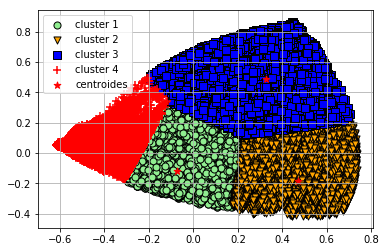

In [26]:
y_km = clusters.fit_predict(X)
plt.scatter(X[y_km==0,0],
          X[y_km==0,1],
          s=50,
          c='lightgreen',
          edgecolor='black',
          marker='o',
          label='cluster 1')
plt.scatter(X[y_km==1,0],
          X[y_km==1,1],
          s=50,
          c='orange',
          edgecolor='black',
          marker='v',
          label='cluster 2')
plt.scatter(X[y_km==2,0],
          X[y_km==2,1],
          s=50,
          c='blue',
          edgecolor='black',
          marker='s',
          label='cluster 3')
plt.scatter(X[y_km==3,0],
          X[y_km==3,1],
          s=50,
          c='red',
          edgecolor='black',
          marker='+',
          label='cluster 4')

plt.scatter(clusters.cluster_centers_[:,0],
          clusters.cluster_centers_[:,1],
          s=50,
          c='red',
          marker='*',
          label='centroides')


plt.legend()
plt.grid()
plt.show()

In [27]:
self=df1
df1.head()

,VIV_SEL,P1_1,P1_2,P1_3,P1_4,P1_5_1,P1_5_2,P2_1,P2_2,P2_3,cve_est,cve_mun
0,5,2,1,1,1,1,1,4,1,1,1,1
1,1,3,1,1,1,1,1,7,1,1,1,1
2,3,3,1,1,1,1,1,8,1,1,1,1
3,4,3,1,1,1,1,1,5,1,1,1,1
4,5,3,1,1,1,1,1,6,1,1,1,1


## agregar columna cluster al dataset

In [28]:
self['cluster']=clusters.fit_predict(X)


In [29]:
self.head()

,VIV_SEL,P1_1,P1_2,P1_3,P1_4,P1_5_1,P1_5_2,P2_1,P2_2,P2_3,cve_est,cve_mun,cluster
0,5,2,1,1,1,1,1,4,1,1,1,1,2
1,1,3,1,1,1,1,1,7,1,1,1,1,2
2,3,3,1,1,1,1,1,8,1,1,1,1,2
3,4,3,1,1,1,1,1,5,1,1,1,1,2
4,5,3,1,1,1,1,1,6,1,1,1,1,2


In [30]:
self=df1
df1.head()

,VIV_SEL,P1_1,P1_2,P1_3,P1_4,P1_5_1,P1_5_2,P2_1,P2_2,P2_3,cve_est,cve_mun,cluster
0,5,2,1,1,1,1,1,4,1,1,1,1,2
1,1,3,1,1,1,1,1,7,1,1,1,1,2
2,3,3,1,1,1,1,1,8,1,1,1,1,2
3,4,3,1,1,1,1,1,5,1,1,1,1,2
4,5,3,1,1,1,1,1,6,1,1,1,1,2


In [25]:
self.to_csv('C:/Users/MALIK/Documents/ProgramaDelfin/Vivienda2015Cluster.csv',index=False)

In [31]:
self.cluster.value_counts()


3    26341
1    20369
0    20250
2    11446
Name: cluster, dtype: int64

In [32]:
self.head()

,VIV_SEL,P1_1,P1_2,P1_3,P1_4,P1_5_1,P1_5_2,P2_1,P2_2,P2_3,cve_est,cve_mun,cluster
0,5,2,1,1,1,1,1,4,1,1,1,1,2
1,1,3,1,1,1,1,1,7,1,1,1,1,2
2,3,3,1,1,1,1,1,8,1,1,1,1,2
3,4,3,1,1,1,1,1,5,1,1,1,1,2
4,5,3,1,1,1,1,1,6,1,1,1,1,2


In [33]:
self

,VIV_SEL,P1_1,P1_2,P1_3,P1_4,P1_5_1,P1_5_2,P2_1,P2_2,P2_3,cve_est,cve_mun,cluster
0,5,2,1,1,1,1,1,4,1,1,1,1,2
1,1,3,1,1,1,1,1,7,1,1,1,1,2
2,3,3,1,1,1,1,1,8,1,1,1,1,2
3,4,3,1,1,1,1,1,5,1,1,1,1,2
4,5,3,1,1,1,1,1,6,1,1,1,1,2
5,2,3,1,1,1,1,1,3,1,1,1,1,2
6,3,3,1,1,1,1,1,3,1,1,1,1,2
7,4,3,1,1,1,1,1,5,1,1,1,1,2
8,5,2,1,1,1,1,1,4,1,1,1,1,2
9,1,2,1,1,1,1,1,5,1,1,1,1,2


## agrupar los datos por estado y municipio, encontar la moda 

In [34]:
df3=self.groupby(['cve_est','cve_mun']).cluster.apply(lambda x: x.mode())


In [35]:
df3

cve_est  cve_mun   
1        1        0    2
         2        0    2
         3        0    2
         4        0    2
         5        0    2
         6        0    2
         7        0    2
         9        0    2
         10       0    2
         11       0    2
2        1        0    2
         2        0    2
         3        0    2
         4        0    2
         5        0    2
3        1        0    2
         2        0    2
         3        0    2
         8        0    2
         9        0    2
4        1        0    2
         2        0    2
         3        0    2
         4        0    2
         5        0    2
         6        0    2
         9        0    2
         10       0    2
         11       0    2
5        2        0    2
                      ..
31       106      0    3
32       5        0    1
         7        0    1
         8        0    1
         10       0    1
         14       0    1
         16       0    1
         17       0    1
     

## convertir a dataframe 

In [36]:
Clus= pd.DataFrame(df3)


In [37]:
Clus

cluster
cve_est cve_mun           
1       1       0        2
        2       0        2
        3       0        2
        4       0        2
        5       0        2
        6       0        2
        7       0        2
        9       0        2
        10      0        2
        11      0        2
2       1       0        2
        2       0        2
        3       0        2
        4       0        2
        5       0        2
3       1       0        2
        2       0        2
        3       0        2
        8       0        2
        9       0        2
4       1       0        2
        2       0        2
        3       0        2
        4       0        2
        5       0        2
        6       0        2
        9       0        2
        10      0        2
        11      0        2
5       2       0        2
...                    ...
31      106     0        3
32      5       0        1
        7       0        1
        8       0        1
        10      0        1
        14      0        1
        16      0        1
        17      0        1
        18      0        1
        20      0        1
        22      0        1
        23      0        1
        31      0        0
        33      0        0
        34      0        0
        35      0        0
        36      0        0
        37      0        0
        38      0        0
        39      0        0
        40      0        0
        42      0        0
        44      0        0
        45      0        0
        48      0        0
        49      0        0
        51      0        0
        55      0        0
        56      0        0
        57      0        0

[886 rows x 1 columns]

In [40]:
Clus.to_csv('C:/Users/MALIK/Documents/ProgramaDelfin/VivCluster.csv')


In [44]:
clusters = pd.read_csv('C:/Users/MALIK/Documents/ProgramaDelfin/VivCluster.csv')
clusters.head()

,cve_est,cve_mun,Unnamed: 2,cluster
0,1,1,0,2
1,1,2,0,2
2,1,3,0,2
3,1,4,0,2
4,1,5,0,2


In [45]:
clusters.drop('Unnamed: 2',1, inplace=True)

In [46]:
clusters.head()

,cve_est,cve_mun,cluster
0,1,1,2
1,1,2,2
2,1,3,2
3,1,4,2
4,1,5,2


## cargar la tabla de delitos 2015

In [55]:
df_delitos= pd.read_csv('C:/Users/MALIK/Downloads/incidenciaMunicipal_2015_clean_cat.csv')
df_delitos.head()

,CVE_ENT,CVE_MUN,CVE_MOD,CVE_TIPO,CVE_SUBTIPO,ENERO,FEBRERO,MARZO,ABRIL,MAYO,JUNIO,JULIO,AGOSTO,SEPTIEMBRE,OCTUBRE,NOVIEMBRE,DICIEMBRE,TOTAL_DELITOS
0,1,1,6,15,16,4,3,0,7,4,6,4,3,4,1,4,7,43
1,1,1,6,15,17,9,10,10,11,11,6,10,18,8,3,14,14,115
2,1,1,6,15,18,4,1,5,3,0,1,1,4,2,5,6,4,32
3,1,1,6,15,19,0,0,0,0,1,0,0,0,0,0,1,0,2
4,1,1,6,15,20,34,32,46,44,49,34,49,56,34,24,49,32,449


## agregar nueva columna al dataset de delitos

In [56]:
df_delitos['VIVIENDA_ENDUTIH_2015'] = 99
df_delitos.head()

,CVE_ENT,CVE_MUN,CVE_MOD,CVE_TIPO,CVE_SUBTIPO,ENERO,FEBRERO,MARZO,ABRIL,MAYO,JUNIO,JULIO,AGOSTO,SEPTIEMBRE,OCTUBRE,NOVIEMBRE,DICIEMBRE,TOTAL_DELITOS,VIVIENDA_ENDUTIH_2015
0,1,1,6,15,16,4,3,0,7,4,6,4,3,4,1,4,7,43,99
1,1,1,6,15,17,9,10,10,11,11,6,10,18,8,3,14,14,115,99
2,1,1,6,15,18,4,1,5,3,0,1,1,4,2,5,6,4,32,99
3,1,1,6,15,19,0,0,0,0,1,0,0,0,0,0,1,0,2,99
4,1,1,6,15,20,34,32,46,44,49,34,49,56,34,24,49,32,449,99


In [57]:
df_delitos.shape

(125004, 19)

In [58]:
clusters.shape

(886, 3)

## ciclo for para asignar numero de cluster de acuerdo al estado y municipio que habíamos encontrado

In [59]:
cont = 0
for entidad,municipio in zip(df_delitos.CVE_ENT,df_delitos.CVE_MUN):
    cont2 = 0
    for est,mun in zip(clusters.cve_est,clusters.cve_mun):
        if entidad == est and municipio == mun:
            df_delitos.VIVIENDA_ENDUTIH_2015[cont] = clusters.cluster[cont2]
        cont2 = cont2+1 
    cont = cont+1
    if cont%1000 == 0:
        print(cont)

1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
11000
12000
13000
14000
15000
16000
17000
18000
19000
20000
21000
22000
23000
24000
25000
26000
27000
28000
29000
30000
31000
32000
33000
34000
35000
36000
37000
38000
39000
40000
41000
42000
43000
44000
45000
46000
47000
48000
49000
50000
51000
52000
53000
54000
55000
56000
57000
58000
59000
60000
61000
62000
63000
64000
65000
66000
67000
68000
69000
70000
71000
72000
73000
74000
75000
76000
77000
78000
79000
80000
81000
82000
83000
84000
85000
86000
87000
88000
89000
90000
91000
92000
93000
94000
95000
96000
97000
98000
99000
100000
101000
102000
103000
104000
105000
106000
107000
108000
109000
110000
111000
112000
113000
114000
115000
116000
117000
118000
119000
120000
121000
122000
123000
124000
125000


In [60]:
df_delitos

,CVE_ENT,CVE_MUN,CVE_MOD,CVE_TIPO,CVE_SUBTIPO,ENERO,FEBRERO,MARZO,ABRIL,MAYO,JUNIO,JULIO,AGOSTO,SEPTIEMBRE,OCTUBRE,NOVIEMBRE,DICIEMBRE,TOTAL_DELITOS,VIVIENDA_ENDUTIH_2015
0,1,1,6,15,16,4,3,0,7,4,6,4,3,4,1,4,7,43,2
1,1,1,6,15,17,9,10,10,11,11,6,10,18,8,3,14,14,115,2
2,1,1,6,15,18,4,1,5,3,0,1,1,4,2,5,6,4,32,2
3,1,1,6,15,19,0,0,0,0,1,0,0,0,0,0,1,0,2,2
4,1,1,6,15,20,34,32,46,44,49,34,49,56,34,24,49,32,449,2
5,1,1,6,15,10,4,2,1,2,4,4,3,4,8,1,3,5,37,2
6,1,1,6,15,6,0,0,0,0,0,0,0,0,0,0,0,0,0,2
7,1,1,6,16,16,172,151,181,155,170,182,173,168,158,144,201,171,1854,2
8,1,1,6,16,17,96,68,107,97,96,89,80,105,91,101,79,94,1007,2
9,1,1,6,16,18,114,106,122,124,138,94,89,93,126,105,152,171,1320,2


## valores de la columna VIVIENDA_ENDUTIH_2015

In [61]:
np.unique(df_delitos.VIVIENDA_ENDUTIH_2015)

array([ 0,  1,  2,  3, 99], dtype=int64)

In [62]:
df_delitos.VIVIENDA_ENDUTIH_2015.value_counts()


99    71346
3     23430
0     14718
1     10758
2      4752
Name: VIVIENDA_ENDUTIH_2015, dtype: int64

In [64]:
df_delitos.to_csv('C:/Users/MALIK/Documents/ProgramaDelfin/incidenciaMunicipal_2015_vivienda.csv')
